In [1]:
from train import bgs 
import h5py 
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [2]:
[dataset] = qml.data.load("other", name="bars-and-stripes") 
inputs = dataset.train['4']['inputs'] # images de pixels 4x4 
    
# Dimensions des inputs: (N, D) 
inputs_np = np.array(inputs)
nb_samples = inputs_np.shape[0] # N ---> samples
nb_pixels  = inputs_np.shape[1] # D ---> features

Nv = 16
Nh = 3

In [3]:
nb_samples

1000

In [4]:
with h5py.File("rbm_parameters.h5", "r") as f:
    print(f.keys()) 

    w     = np.array(f['weight_matrix'])
    eta   = np.array(f['eta_vector'])    
    theta = np.array(f['theta_vector'])
    llh   = np.array(f['log_likelihoods'])

    print(w)
    print(eta)
    print(theta)
    print(llh)

<KeysViewHDF5 ['weight_matrix', 'eta_vector', 'theta_vector', 'log_likelihoods']>
[[-5.72993697 -5.72993697 -5.72993697]
 [-7.19454061 -7.19454061 -7.19454061]
 [-6.38943409 -6.38943409 -6.38943409]
 [-5.70855621 -5.70855621 -5.70855621]
 [-5.07944133 -5.07944133 -5.07944133]
 [-5.95661391 -5.95661391 -5.95661391]
 [-5.58696255 -5.58696255 -5.58696255]
 [-5.08778585 -5.08778585 -5.08778585]
 [-5.02156808 -5.02156808 -5.02156808]
 [-5.95295484 -5.95295484 -5.95295484]
 [-5.48276401 -5.48276401 -5.48276401]
 [-4.6855848  -4.6855848  -4.6855848 ]
 [-5.85447377 -5.85447377 -5.85447377]
 [-6.67426947 -6.67426947 -6.67426947]
 [-6.42892331 -6.42892331 -6.42892331]
 [-6.06059508 -6.06059508 -6.06059508]]
[0.62927268 0.62709768 0.62724768]
[-2.22208868 -1.74243151 -2.4013519  -1.74819229 -2.10403387 -1.57684436
 -2.08230544 -1.41778247 -1.52758085 -1.47751163 -1.35180066 -1.17654822
 -2.04482378 -1.5426603  -1.67158094 -1.63613499]
[-14.91342448 -14.59218828 -14.28574176 -13.98234287 -13.69139

In [5]:
sample_v = np.array([bgs(w, eta, theta, Nv, Nh, 10)[1] for i in range(nb_samples)])

sample_v[0 : 3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]])

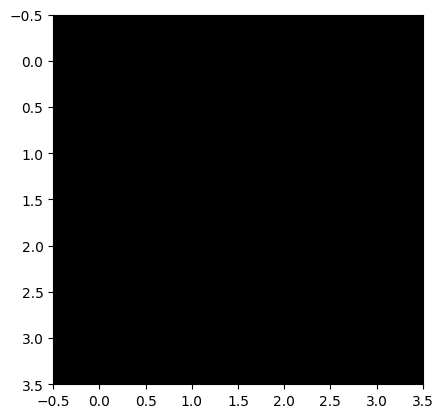

In [6]:
plt.imshow(sample_v[0].reshape(4, 4), cmap='gray')

In [7]:
def plot_image(
    sample, shape=(28, 28), grid_size=(10, 10), show_grid=False, randomize=True
):
    """Args:
    sample
    shape: (Default value = (28)
    28)
    grid_size: (Default value = (10)
    10)
    show_grid: (Default value = False)
    randomize: (Default value = True)
    """
    num_samples = grid_size[0] * grid_size[1]
    if randomize:
        id_sample = np.random.randint(0, sample.shape[0], num_samples)
    else:
        id_sample = np.arange(num_samples)

    # Create a display array with the appropriate size
    display = np.zeros((shape[0] * grid_size[0], shape[1] * grid_size[1]))

    for i, id_s in enumerate(id_sample):
        # Calculate the row and column for the grid
        idx = i // grid_size[1]  # Row index
        idy = i % grid_size[1]  # Column index

        # Ensure the sample can be reshaped to the specified shape
        display[
            (idx * shape[0]) : ((idx + 1) * shape[0]),
            (idy * shape[1]) : ((idy + 1) * shape[1]),
        ] = sample[id_s].reshape(
            shape
        )  # Directly reshape to shape

    # Plot the display image
    fig, ax = plt.subplots(1, 1)
    ax.imshow(display, cmap="gray")
    ax.axis("off")  # Hide axes

    if show_grid:
        # Minor ticks for the grid
        ax.set_xticks(np.arange(-0.5, grid_size[1] * shape[1], shape[1]), minor=True)
        ax.set_yticks(np.arange(-0.5, grid_size[0] * shape[0], shape[0]), minor=True)

        # Gridlines based on minor ticks
        ax.grid(which="minor", color="gray", linestyle="-", linewidth=2)

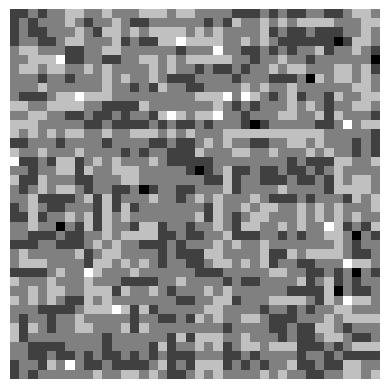

In [8]:

plot_image(sample=inputs_np.astype(int), shape=(4, 4), grid_size=(10, 10), show_grid=True)

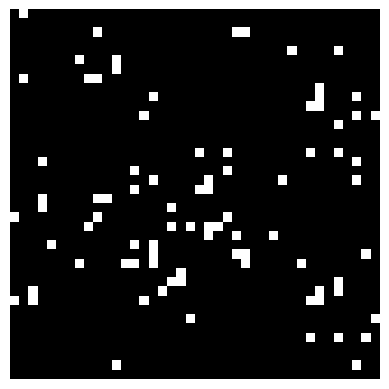

In [9]:
plot_image(sample=sample_v, shape=(4, 4), grid_size=(10, 10), show_grid=True)

In [10]:
llh

array([-14.91342448, -14.59218828, -14.28574176, -13.98234287,
       -13.69139245, -13.40504804, -13.10530185, -12.8610309 ,
       -12.5904018 , -12.31520945, -12.09750811, -11.83988727,
       -11.60753888, -11.41319338, -11.16805589, -10.94138581,
       -10.73446931, -10.54912216, -10.32372165, -10.16279916,
        -9.88857936,  -9.75575343,  -9.53240585,  -9.41240899,
        -9.22995944,  -9.06619453,  -8.92671271,  -8.70547688,
        -8.62476649,  -8.42007351,  -8.32826782,  -8.1144307 ,
        -8.03792257,  -7.88968382,  -7.73401881,  -7.69016208,
        -7.48774115,  -7.41083488,  -7.27780743,  -7.13799025,
        -7.04482649,  -6.93067654,  -6.82266062,  -6.76756912,
        -6.61275706,  -6.5632048 ,  -6.3681049 ,  -6.24083591,
        -6.24522514,  -6.11872747,  -6.01101635,  -5.91613264,
        -5.81170841,  -5.77819369,  -5.66127787,  -5.55401188,
        -5.5431441 ,  -5.41363271,  -5.38995094,  -5.26991274,
        -5.16592864,  -5.1976824 ,  -5.05917774,  -4.98

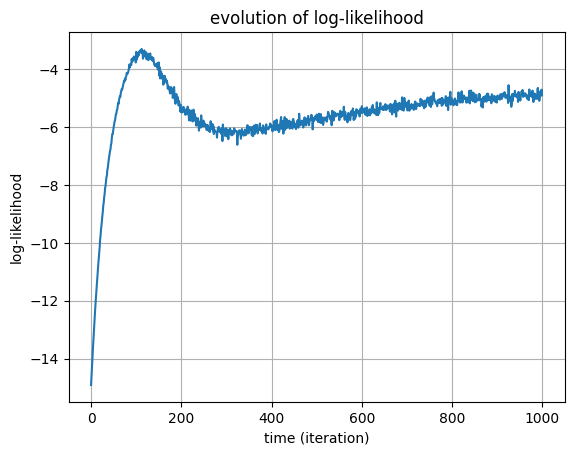

In [11]:
plt.plot(llh)
plt.xlabel("time (iteration)")
plt.ylabel("log-likelihood")
plt.title("evolution of log-likelihood")
plt.grid(True)